In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
basedir = os.path.dirname(os.path.abspath(''))
sourcedir = os.path.join(basedir, 'source')
import sys
sys.path.insert(0, sourcedir)
from source.mcmc import MCMC
from source.mcmc_state import State

%config InlineBackend.figure_format = 'retina'
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

datadir = os.path.join(basedir, 'data')

binned_data_file = os.path.join(datadir, 'lcparam_DS17f.txt')
binned_sys_file = os.path.join(datadir, 'sys_DS17f.txt')

    # The for loop is to allow for the option of plotting multiple chains on the same chart
    # (It just kinda looks cool)
print(f"Starting Markov Chain")
start = [np.random.uniform(0, 1), np.random.uniform(0,1), np.random.uniform(50,100), np.random.uniform(-25, -15)]
start = State(start)
    #start = [.25, .74, 68]
g_cov_test = np.diag([.01, .01, .1, .01])
markov_chain = MCMC(initial_state=start,
                    data_file=binned_data_file,
                    systematics_file=binned_sys_file, 
                    g_cov=g_cov_test)

markov_chain.make_chain(1000)

print(markov_chain.chain)

s1 tuple (1.0, 2.0, 3.0, 4.0)
s1[0] 1.0
str s1 (Omega_m: 1.0, Omega_L: 2.0, H0: 3.0, M: 4.0)
repr s1 [<State Omega_m: 1.0, Omega_L: 2.0, H0: 3.0, M: 4.0>]
s1 values 1.0 2.0 3.0 4.0
s2 values 5.0 6.0 7.0 8.0
s3 0 6.0
add two lists (Omega_m: 6.0, Omega_L: 8.0, H0: 10.0, M: 12.0)
s1*4 (Omega_m: 4.0, Omega_L: 8.0, H0: 12.0, M: 16.0)
Starting Markov Chain
Printing initial state: (Omega_m: 0.7312561490854425, Omega_L: 0.7883937521529981, H0: 57.56039171146263, M: -24.843565398529634)
Chain after addition of initial state: self.chain=array([[0.7312561490854425, 0.7883937521529981, 57.56039171146263,
        -24.843565398529634]], dtype=object) type(self.chain)=<class 'numpy.ndarray'>
len(self.chain)=1 self.chain.shape=(1, 4)
[[0.7312561490854425 0.7883937521529981 57.56039171146263
  -24.843565398529634]
 [0.7120379214275647 0.7129953827078869 57.64500317627468
  -25.01404336122744]
 [0.6482443125676518 0.8395998737078105 57.821306679786964
  -24.91682562856534]
 ...
 [0.37636150292146486 0.7

self <source.mcmc.MCMC object at 0x0000022174E30DC0>
type self <class 'source.mcmc.MCMC'>
first ten of chain [[0.7312561490854425 0.7883937521529981 57.56039171146263
  -24.843565398529634]
 [0.7120379214275647 0.7129953827078869 57.64500317627468
  -25.01404336122744]
 [0.6482443125676518 0.8395998737078105 57.821306679786964
  -24.91682562856534]
 [0.8404884002868978 0.7809983896938318 57.9313973330906
  -24.900285028931876]
 [0.8045752807652465 0.7265199628204817 57.62378767858587
  -24.883080883645032]
 [0.6851434335043732 0.8157275508763632 57.42419244794584
  -24.853812793174146]
 [0.6704759471696919 0.7804867013270518 57.229224414619935
  -24.77829232013085]
 [0.6607900863082865 0.5959320457478743 57.46181099817817
  -24.848912532542812]
 [0.6361502827464144 0.7714814021233023 57.16528300438457
  -24.914814278231685]
 [0.6910158496479051 0.673982067626155 57.127566945865034
  -24.87765042020072]]
first ten of chain [[0.7312561490854425 0.7883937521529981 57.56039171146263
  -24.

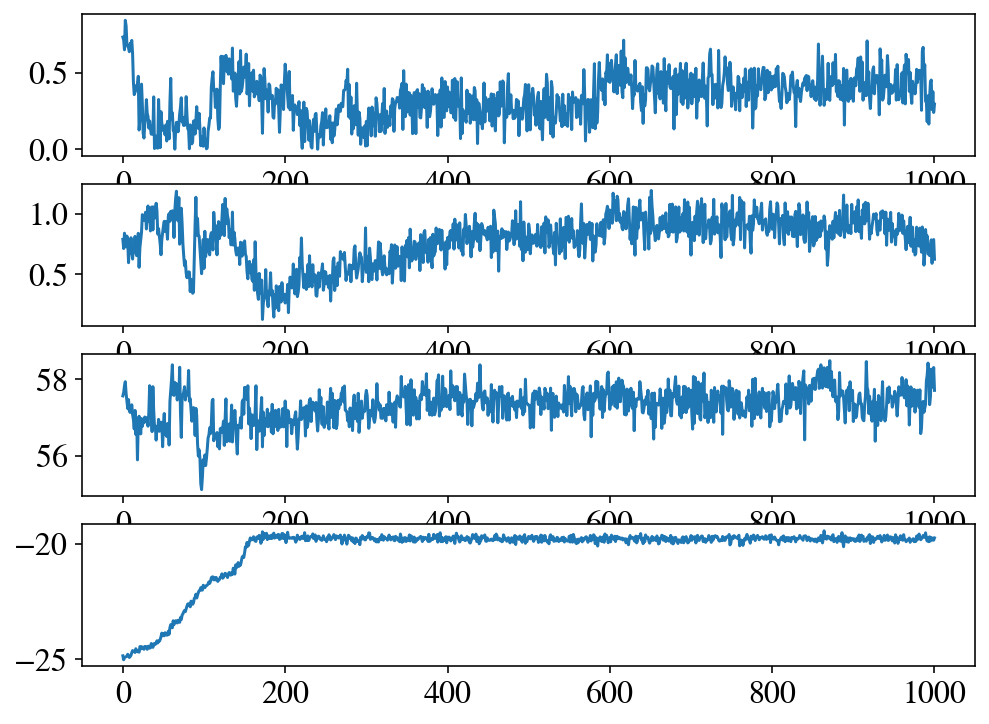

In [2]:
fig, ax = plt.subplots(4,1)

ax[0].plot(markov_chain.Omega_m)
ax[1].plot(markov_chain.Omega_L)
ax[2].plot(markov_chain.H0)
ax[3].plot(markov_chain.M)
plt.show()

In [4]:
x = markov_chain.chain
print(x, type(x))
print(x.T, type(x.T))
cov = np.cov(markov_chain.chain.T)
alpha= .1
cov*=alpha
print(cov)

[[0.7312561490854425 0.7883937521529981 57.56039171146263
  -24.843565398529634]
 [0.7120379214275647 0.7129953827078869 57.64500317627468
  -25.01404336122744]
 [0.6482443125676518 0.8395998737078105 57.821306679786964
  -24.91682562856534]
 ...
 [0.37636150292146486 0.7747315178436224 57.89570286519704
  -19.853586245849574]
 [0.24048741663602882 0.7868802678440763 58.30243319303115
  -19.850339517165136]
 [0.29461288227623633 0.6242991035124916 57.704718921975854
  -19.75445550285277]] <class 'numpy.ndarray'>
[[0.7312561490854425 0.7120379214275647 0.6482443125676518 ...
  0.37636150292146486 0.24048741663602882 0.29461288227623633]
 [0.7883937521529981 0.7129953827078869 0.8395998737078105 ...
  0.7747315178436224 0.7868802678440763 0.6242991035124916]
 [57.56039171146263 57.64500317627468 57.821306679786964 ...
  57.89570286519704 58.30243319303115 57.704718921975854]
 [-24.843565398529634 -25.01404336122744 -24.91682562856534 ...
  -19.853586245849574 -19.850339517165136 -19.7544

AttributeError: 'float' object has no attribute 'shape'

In [ ]:
start = [np.random.uniform(0, 1), np.random.uniform(0,1), np.random.uniform(50,100), np.random.uniform(-25, -15)]
    #start = [.25, .74, 68]
markov_chain2 = MCMC(initial_state=start,
                    data_file=binned_data_file,
                    systematics_file=binned_sys_file, 
                    g_cov=cov)

markov_chain2.make_chain(10000)

In [ ]:
fig, ax = plt.subplots(4,1)
ax[0].plot(markov_chain2.chain[:,0])
ax[1].plot(markov_chain2.chain[:,1])
ax[2].plot(markov_chain2.chain[:,2])
ax[3].plot(markov_chain2.chain[:,3])
plt.show()

In [ ]:
plt.hist2d(markov_chain2.chain[500:,0], markov_chain2.chain[500:,1], bins=(50, 50), cmap=plt.cm.jet)
plt.show()